In [1]:
!pip install seaborn
!pip install matplotlib
!pip install ptitprince
!pip install pandas

     |████████████████████████████████| 61kB 4.2MB/s 
  Created wheel for ptitprince: filename=ptitprince-0.2.5-cp37-none-any.whl size=8429 sha256=4f788c7b7027b18bfe8caeded5a5704bcf09df5bae0a32282c52f4b0157cf6ca
  Stored in directory: /root/.cache/pip/wheels/fb/c1/75/2ef8da161053bdf8e03f9a360f426accd4fac1ddf7f6ed0029
Successfully built ptitprince


In [3]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
#sns.set(style="darkgrid")
#sns.set(style="whitegrid")
#sns.set_style("white")
sns.set(style="whitegrid",font_scale=2)
import matplotlib.collections as clt


import ptitprince as pt

In [4]:
savefigs = True
figs_dir = '../figs/tutorial_python'

if savefigs:
    # Make the figures folder if it doesn't yet exist
    if not os.path.isdir('../figs/tutorial_python'):
        os.makedirs('../figs/tutorial_python')

In [5]:
def export_fig(axis,text, fname):
    if savefigs:
        axis.text()
        axis.savefig(fname, bbox_inches='tight')

In [13]:
df = pd.read_csv("/content/simdat.csv", sep=",")
df.head()

,Unnamed: 0,group,score,gr2
0,1,Group1,34.318801,high
1,2,Group1,40.113776,high
2,3,Group1,93.387266,high
3,4,Group1,46.235969,high
4,5,Group1,47.537756,high


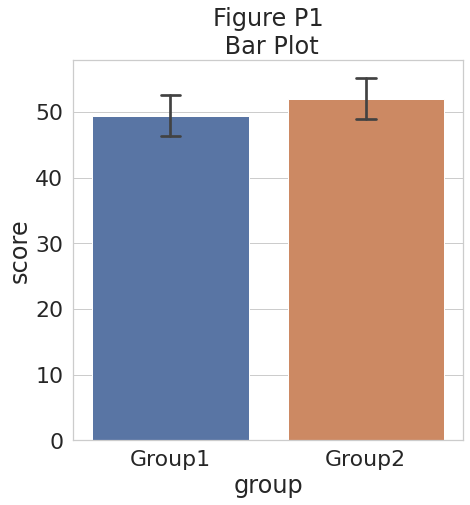

In [14]:
f, ax = plt.subplots(figsize=(7, 7))

sns.barplot(x = "group", y = "score", data = df, capsize= .1)
plt.title("Figure P1\n Bar Plot")

if savefigs:
    plt.savefig('../figs/tutorial_python/figureP01.png', bbox_inches='tight')

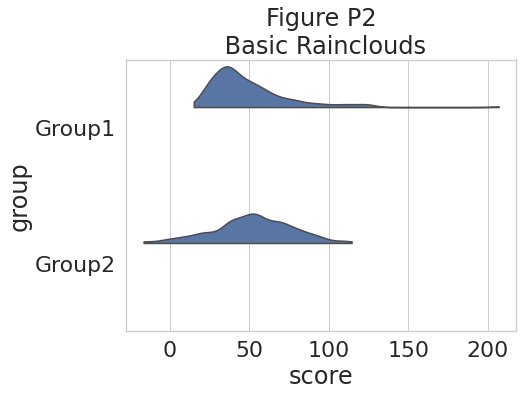

In [15]:
# plotting the clouds
f, ax = plt.subplots(figsize=(7, 5))
dy="group"; dx="score"; ort="h"; pal = sns.color_palette(n_colors=1)

ax=pt.half_violinplot( x = dx, y = dy, data = df, palette = pal, bw = .2, cut = 0.,
                      scale = "area", width = .6, inner = None, orient = ort)

plt.title("Figure P2\n Basic Rainclouds")
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP02.png', bbox_inches='tight')

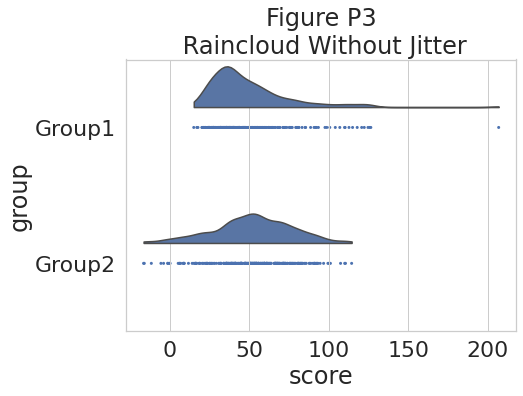

In [16]:
# adding the rain
f, ax = plt.subplots(figsize=(7, 5))
ax=pt.half_violinplot( x = dx, y = dy, data = df, palette = pal, bw = .2, cut = 0.,
                      scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = df, palette = pal, edgecolor = "white",
                 size = 3, jitter = 0, zorder = 0, orient = ort)

plt.title("Figure P3\n Raincloud Without Jitter")
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP03.png', bbox_inches='tight')

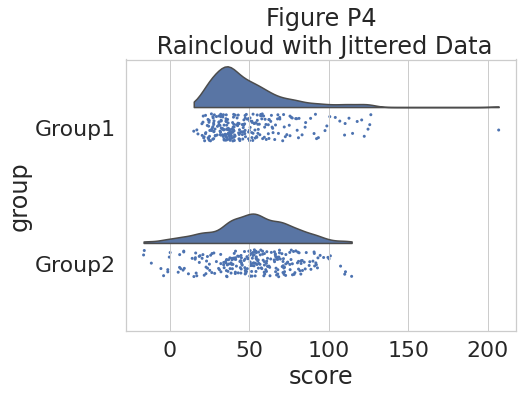

In [17]:
# adding jitter to the rain
f, ax = plt.subplots(figsize=(7, 5))
ax=pt.half_violinplot( x = dx, y = dy, data = df, palette = pal, bw = .2, cut = 0.,
                      scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = df, palette = pal, edgecolor = "white",
                 size = 3, jitter = 1, zorder = 0, orient = ort)

plt.title("Figure P4\n Raincloud with Jittered Data")
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP04.png', bbox_inches='tight')

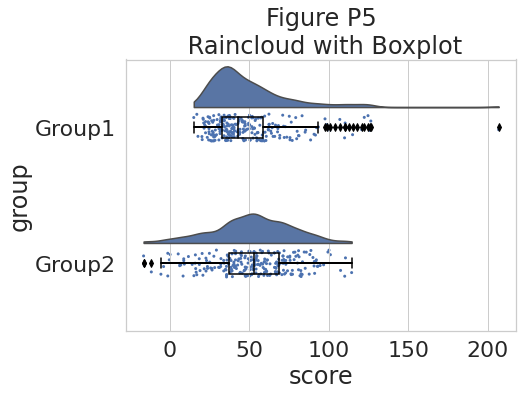

In [18]:
#adding the boxplot with quartiles
f, ax = plt.subplots(figsize=(7, 5))
ax=pt.half_violinplot( x = dx, y = dy, data = df, palette = pal, bw = .2, cut = 0.,
                      scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = df, palette = pal, edgecolor = "white",
                 size = 3, jitter = 1, zorder = 0, orient = ort)
ax=sns.boxplot( x = dx, y = dy, data = df, color = "black", width = .15, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = ort)

plt.title("Figure P5\n Raincloud with Boxplot")
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP05.png', bbox_inches='tight')

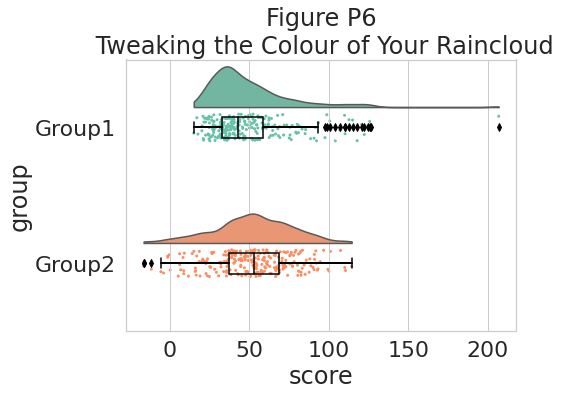

In [19]:
#adding color
pal = "Set2"
f, ax = plt.subplots(figsize=(7, 5))

ax=pt.half_violinplot( x = dx, y = dy, data = df, palette = pal, bw = .2, cut = 0.,
                      scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = df, palette = pal, edgecolor = "white",
                 size = 3, jitter = 1, zorder = 0, orient = ort)
ax=sns.boxplot( x = dx, y = dy, data = df, color = "black", width = .15, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = ort)

plt.title("Figure P6\n Tweaking the Colour of Your Raincloud")
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP06.png', bbox_inches='tight')

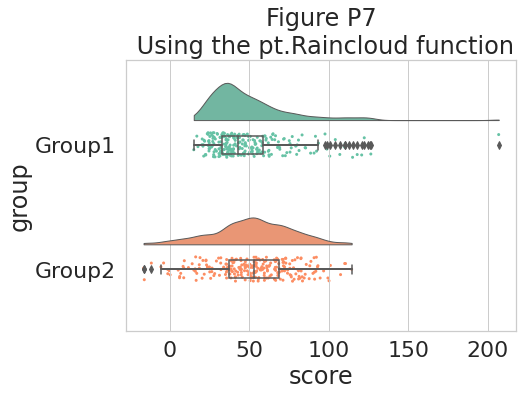

In [20]:
#same thing with a single command: now x **must** be the categorical value
dx = "group"; dy = "score"; ort = "h"; pal = "Set2"; sigma = .2
f, ax = plt.subplots(figsize=(7, 5))

pt.RainCloud(x = dx, y = dy, data = df, palette = pal, bw = sigma,
                 width_viol = .6, ax = ax, orient = ort)

plt.title("Figure P7\n Using the pt.Raincloud function")
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP07.png', bbox_inches='tight')

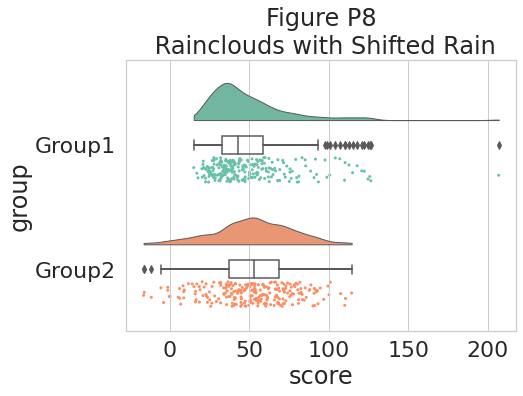

In [21]:
#moving the rain below the boxplot
dx = "group"; dy = "score"; ort = "h"; pal = "Set2"; sigma = .2
f, ax = plt.subplots(figsize=(7, 5))

ax=pt.RainCloud(x = dx, y = dy, data = df, palette = pal, bw = sigma,
                 width_viol = .6, ax = ax, orient = ort, move = .2)

plt.title("Figure P8\n Rainclouds with Shifted Rain")
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP08.png', bbox_inches='tight')

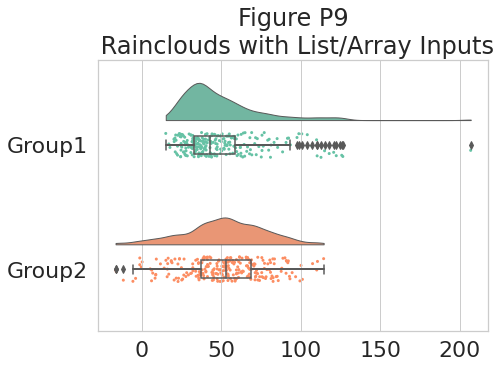

In [22]:
# Usage with a list/np.array input
dx = list(df["group"]); dy = list(df["score"])
f, ax = plt.subplots(figsize=(7, 5))

ax=pt.RainCloud(x = dx, y = dy, palette = pal, bw = sigma,
                 width_viol = .6, ax = ax, orient = ort)

plt.title("Figure P9\n Rainclouds with List/Array Inputs")
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP09.png', bbox_inches='tight')

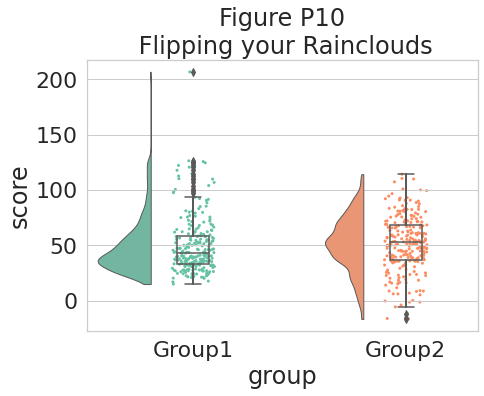

In [23]:
# Changing orientation
dx="group"; dy="score"; ort="v"; pal = "Set2"; sigma = .2
f, ax = plt.subplots(figsize=(7, 5))

ax=pt.RainCloud(x = dx, y = dy, data = df, palette = pal, bw = sigma,
                 width_viol = .5, ax = ax, orient = ort)

plt.title("Figure P10\n Flipping your Rainclouds")
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP10.png', bbox_inches='tight')

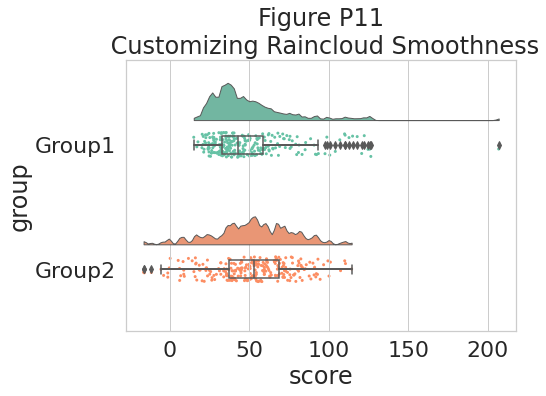

In [24]:
#changing cloud smoothness
dx="group"; dy="score"; ort="h"; pal = "Set2"; sigma = .05
f, ax = plt.subplots(figsize=(7, 5))

ax=pt.RainCloud(x = dx, y = dy, data = df, palette = pal, bw = sigma,
                 width_viol = .6, ax = ax, orient = ort)

plt.title("Figure P11\n Customizing Raincloud Smoothness")
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP11.png', bbox_inches='tight')

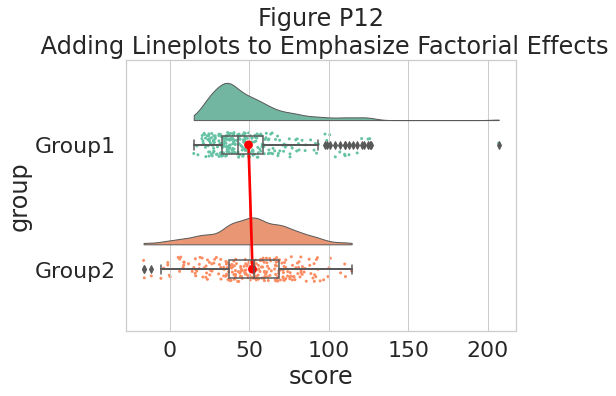

In [25]:
#adding a red line connecting the groups' mean value (useful for longitudinal data)
dx="group"; dy="score"; ort="h"; pal = "Set2"; sigma = .2
f, ax = plt.subplots(figsize=(7, 5))

ax=pt.RainCloud(x = dx, y = dy, data = df, palette = pal, bw = sigma,
                 width_viol = .6, ax = ax, orient = ort,
               pointplot = True)

plt.title("Figure P12\n Adding Lineplots to Emphasize Factorial Effects")
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP12.png', bbox_inches='tight')

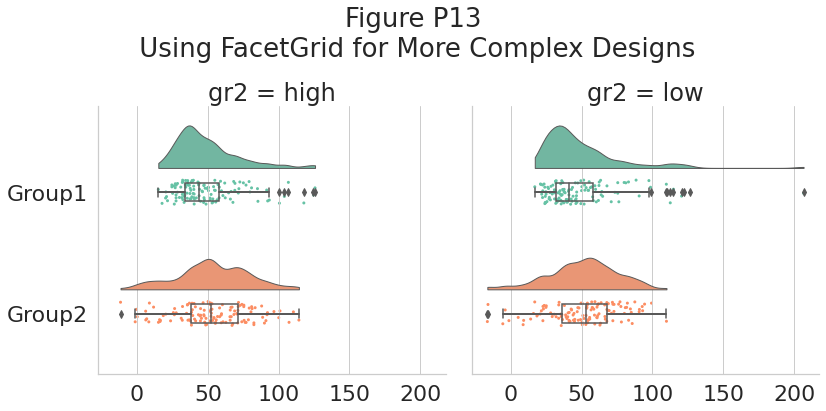

In [26]:
# Rainclouds with FacetGrid
g = sns.FacetGrid(df, col = "gr2", height = 6)
g = g.map_dataframe(pt.RainCloud, x = "group", y = "score", data = df,
                    orient = "h")

g.fig.subplots_adjust(top=0.75)
g.fig.suptitle("Figure P13\n Using FacetGrid for More Complex Designs",  fontsize=26)
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP13.png', bbox_inches='tight')

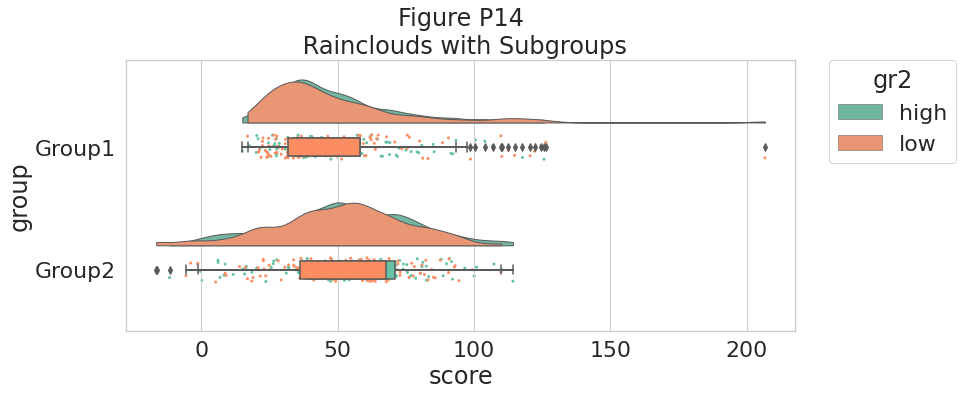

In [29]:
 #Hue Input for Subgroups
dx="group"; dy="score"; dhue = "gr2"; ort="h"; pal = "Set2"; sigma = .2
f, ax = plt.subplots(figsize=(12, 5))

ax=pt.RainCloud(x = dx, y = dy, hue = dhue, data = df, palette = pal, bw = sigma,
                 width_viol = .7, ax = ax, orient = ort)

plt.title("Figure P14\n Rainclouds with Subgroups")
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP14.png', bbox_inches='tight')#

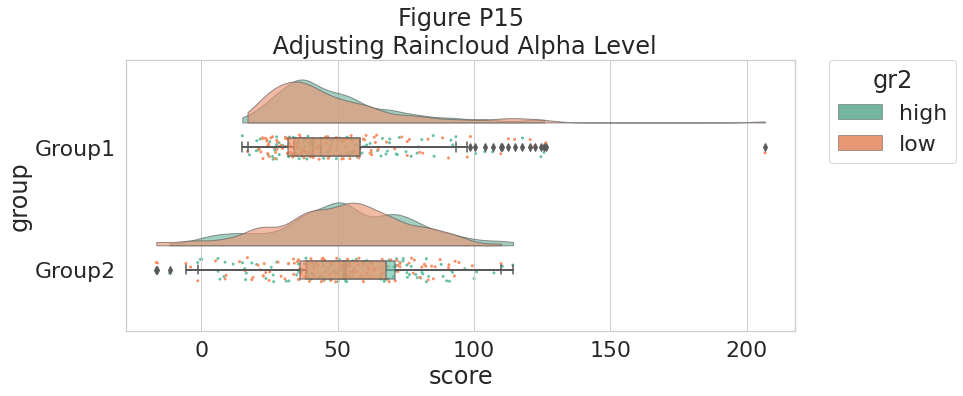

In [30]:
# Setting alpha level
f, ax = plt.subplots(figsize=(12, 5))

ax=pt.RainCloud(x = dx, y = dy, hue = dhue, data = df, palette = pal, bw = sigma,
                 width_viol = .7, ax = ax, orient = ort , alpha = .65)

plt.title("Figure P15\n Adjusting Raincloud Alpha Level")
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP15.png', bbox_inches='tight')

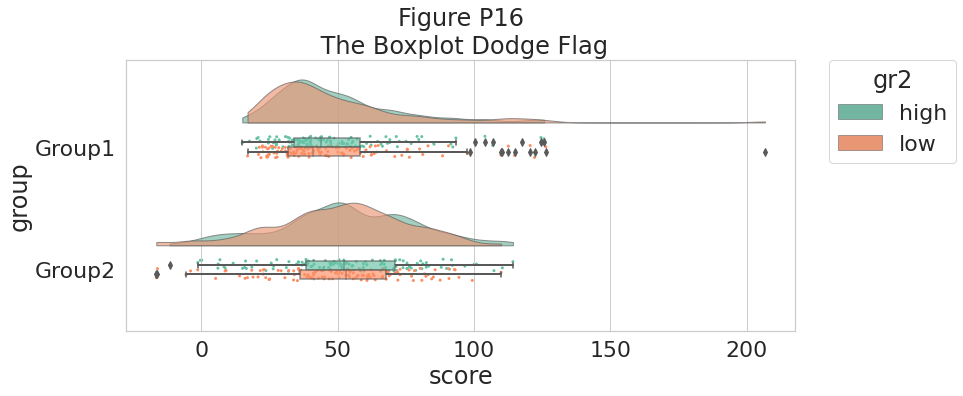

In [31]:
#The Doge Flag
f, ax = plt.subplots(figsize=(12, 5))

ax=pt.RainCloud(x = dx, y = dy, hue = dhue, data = df, palette = pal, bw = sigma,
                 width_viol = .7, ax = ax, orient = ort , alpha = .65, dodge = True)

plt.title("Figure P16\n The Boxplot Dodge Flag")
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP16.png', bbox_inches='tight')

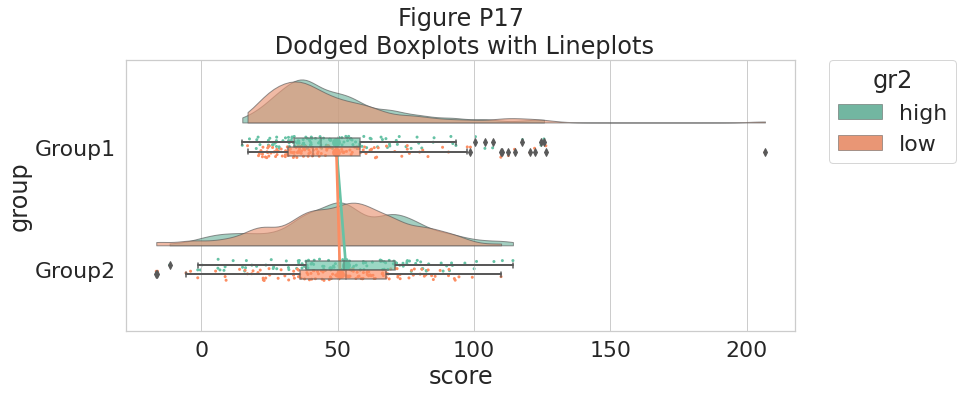

In [32]:
#same, with dodging and line
f, ax = plt.subplots(figsize=(12, 5))
ax=pt.RainCloud(x = dx, y = dy, hue = dhue, data = df, palette = pal, bw = sigma, width_viol = .7,
                ax = ax, orient = ort , alpha = .65, dodge = True, pointplot = True)

plt.title("Figure P17\n Dodged Boxplots with Lineplots")
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP17.png', bbox_inches='tight')